In [76]:
%matplotlib notebook

import h5py
import numpy as np
from matplotlib import pyplot as plt

In [77]:
f.close()
f = h5py.File('/reg/d/psdm/cxi/cxig0715/scratch/smalldata/run151.h5', 'r')
f.keys()

[u'ebeam',
 u'event_time',
 u'evr',
 u'fiducials',
 u'gas_detector',
 u'phase_cav',
 u'probe_energy',
 u'probe_mag',
 u'pulse_time',
 u'pump_energy',
 u'pump_mag',
 u'radial_profile',
 u'radial_profile_qvalues']

(22900, 500)


<IPython.core.display.Javascript object>


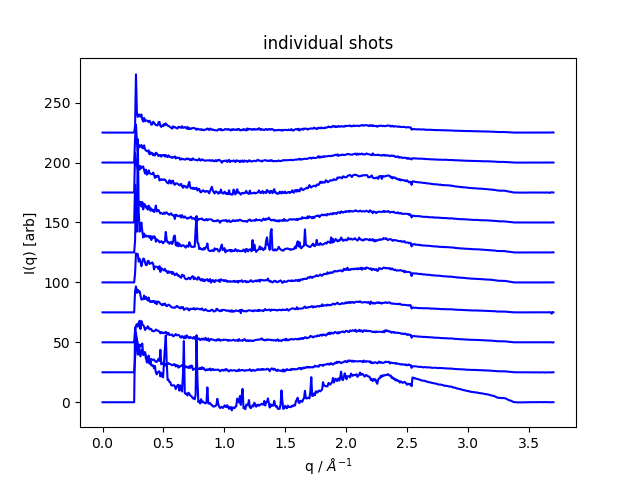

<IPython.core.display.Javascript object>


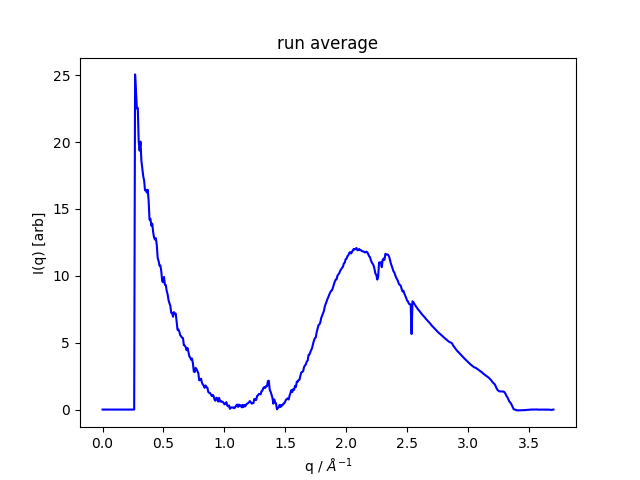

In [78]:
q = np.array(f['radial_profile_qvalues'])
rp = np.array(f['radial_profile'])
print(rp.shape)

plt.figure()
plt.title('individual shots')
#for n,i in enumerate( np.random.randint(0, rp.shape[0], size=10) ):
for i in range(10):
    n=i
    plt.plot(q, rp[int(i),:] + 25 * n, color='blue')
plt.xlabel('q / $\AA^{-1}$')
plt.ylabel('I(q) [arb]')
plt.show()

plt.figure()
plt.title('run average')
plt.plot(q, rp.mean(axis=0), color='blue')
plt.xlabel('q / $\AA^{-1}$')
plt.ylabel('I(q) [arb]')
plt.show()

<IPython.core.display.Javascript object>


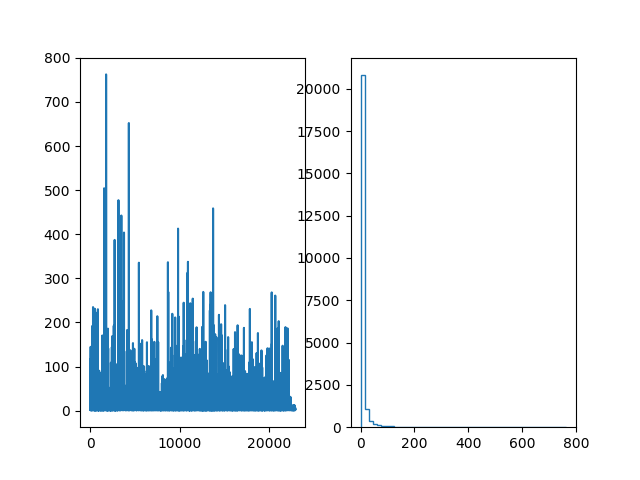

In [86]:
xtal = np.gradient(rp[:,40:120], axis=1).max(1) #/ rp[:,40:120].mean(1)

plt.figure()
plt.subplot(121)
plt.plot(xtal)
#plt.ylim([0,30])

plt.subplot(122)
plt.hist(xtal, 50, histtype='step')
plt.show()

<IPython.core.display.Javascript object>


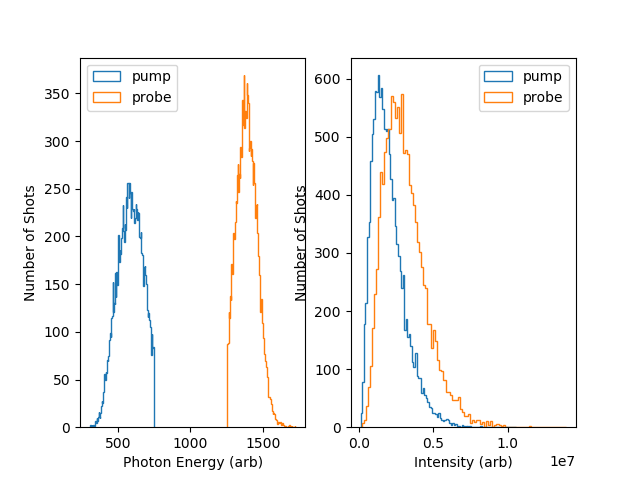

In [13]:
probe_energy = np.array(f['probe_energy'])
probe_mag    = np.array(f['probe_mag'])

pump_energy  = np.array(f['pump_energy'])
pump_mag     = np.array(f['pump_mag'])

plt.figure()

plt.subplot(121)
plt.hist(pump_energy, histtype='step', bins=100)
plt.hist(probe_energy, histtype='step', bins=100)
plt.xlabel('Photon Energy (arb)')
plt.ylabel('Number of Shots')
plt.legend(['pump', 'probe'])

plt.subplot(122)
plt.hist(pump_mag, histtype='step', bins=100)
plt.hist(probe_mag, histtype='step', bins=100)
plt.xlabel('Intensity (arb)')
plt.ylabel('Number of Shots')
plt.legend(['pump', 'probe'])

plt.show()

(13070, 2)


<IPython.core.display.Javascript object>


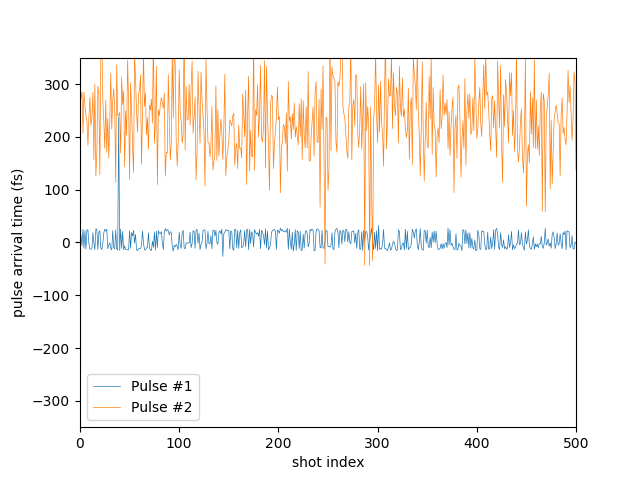

<IPython.core.display.Javascript object>


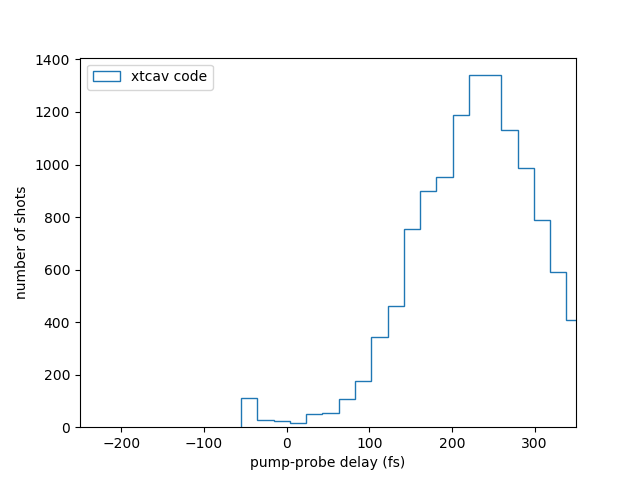

In [17]:
pt = np.array(f['pulse_time'])
print(pt.shape)

plt.figure()
plt.plot(pt, lw=0.5)
plt.xlabel('shot index')
plt.ylabel('pulse arrival time (fs)')
plt.xlim([0,500])
plt.ylim([-350, 350])
plt.legend(['Pulse #1', 'Pulse #2'])
plt.show()

plt.figure()
plt.hist(pt[:,1] - pt[:,0], histtype='step', bins=100)
plt.xlabel('pump-probe delay (fs)')
plt.ylabel('number of shots')
plt.legend(['xtcav code', 'simple method'])
plt.xlim([-250,350])
plt.show()